#Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
##  Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df=pd.read_csv("uber.csv")

In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


##Converting Pickup and Dropoff Datetime to Standard Format

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
from math import *

def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    for pos in range (len(longitude1)):
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1

        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2

        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371
        travel_dist.append(c)

    return  travel_dist

In [ ]:
df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [ ]:
df.drop(columns=["Unnamed: 0", "key"], inplace=True)

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
dist_travel_km,"Axes(0.125,0.448049;0.352273x0.0939024)"


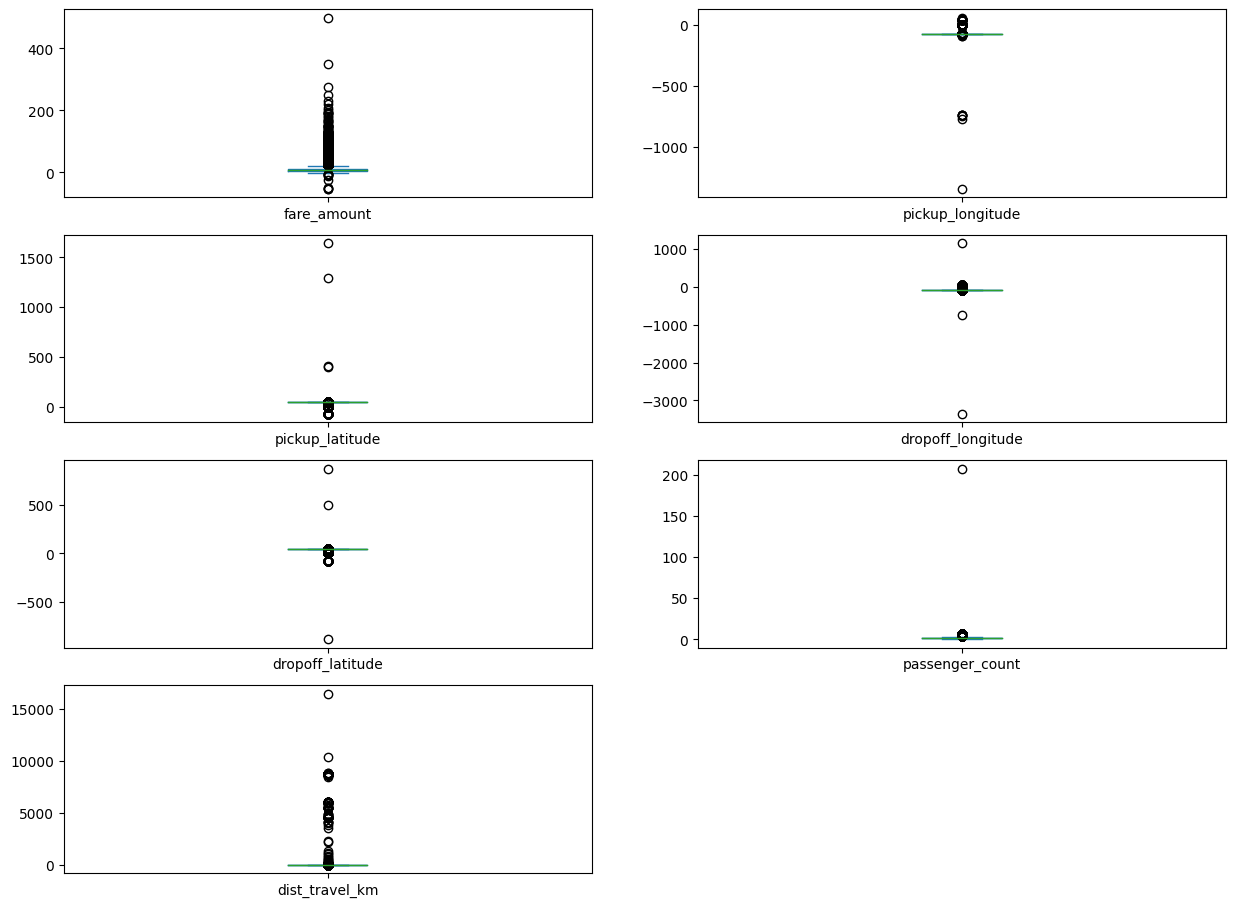

In [ ]:
df.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

In [ ]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1


In [ ]:
df = treat_outliers_all(df , df.iloc[: , 0::])

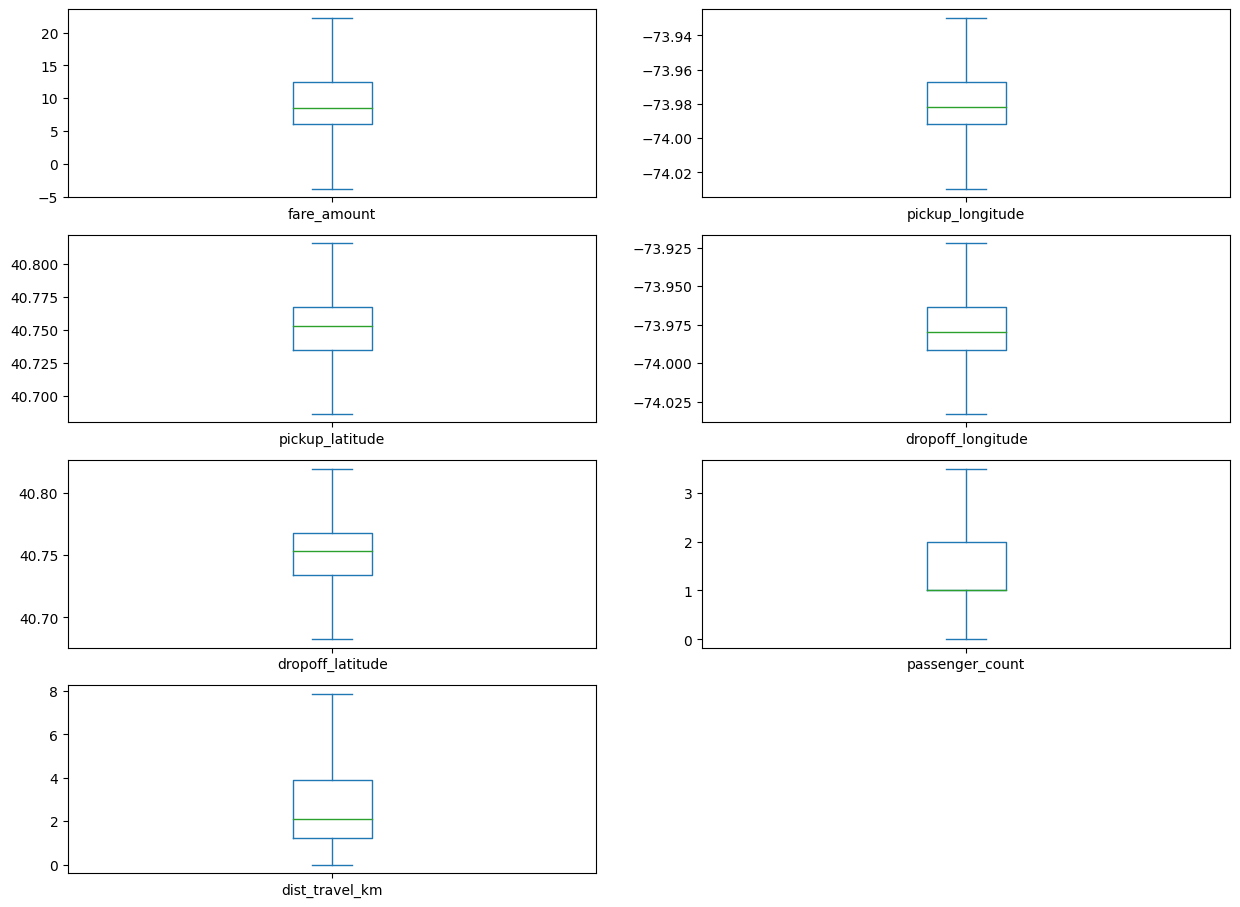

In [ ]:

df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

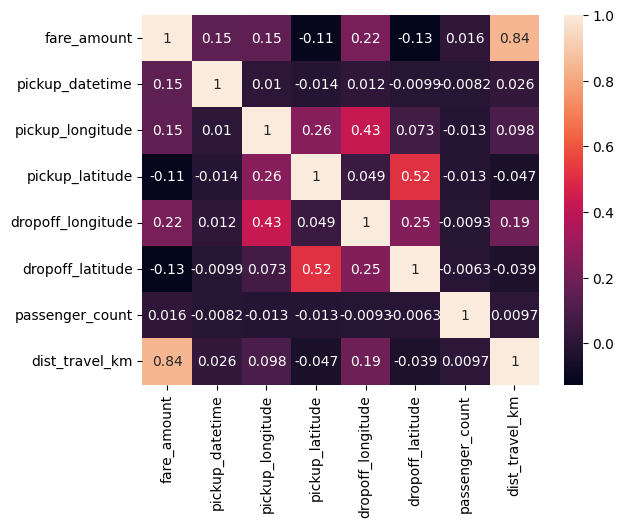

In [ ]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
X = df[['dist_travel_km']]
y = df['fare_amount']

y

,fare_amount
0,7.50
1,7.70
2,12.90
3,5.30
4,16.00
...,...
199995,3.00
199996,7.50
199997,22.25
199998,14.50


##Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear** **Regression**

In [ ]:
lr= LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr

array([ 8.51056084,  6.15301208, 11.16009255, ...,  6.11346131,
       11.08745589,  7.30365535])

In [ ]:
y_pred_lr[0]

8.510560842762832

In [ ]:
#evaluation
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mse_lr = metrics.mean_squared_error(y_test,y_pred_lr)
mean_lr = metrics.mean_absolute_error(y_test,y_pred_lr)
print("R2:", r2_lr)
print("RMSE:", rmse_lr)
print("MSE:", mse_lr)
print("MAE:", mean_lr)



R2: 0.6973691772130716
RMSE: 2.9962555731620046
MSE: 8.977547459704374
MAE: 2.0072185909929305


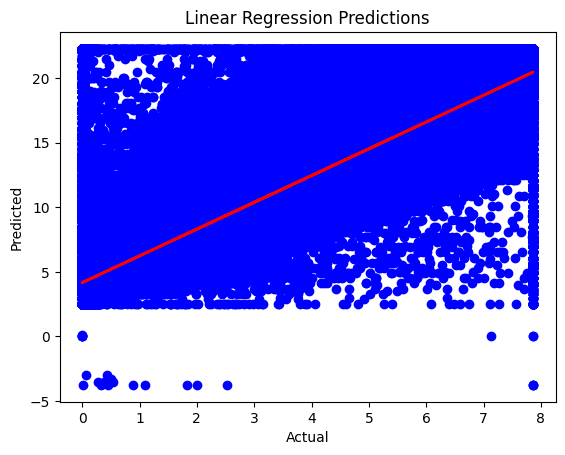

In [ ]:
y_reg_line = lr.predict(X)
plt.scatter( X, y, color='blue')
plt.plot(X, y_reg_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions')

plt.show()

#**Random** **Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[ 8.188  5.336 13.451 ...  4.624  9.259  6.487]


In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf = metrics.mean_squared_error(y_test,y_pred_rf)
mean_rf = metrics.mean_absolute_error(y_test,y_pred_rf)
print("R2:", r2_rf)
print("RMSE:", rmse_rf)
print("MSE:", mse_rf)
print("MAE:", mean_rf)

R2: 0.6474579669000493
RMSE: 3.2339085005787664
MSE: 10.458164190115607
MAE: 2.195447827436284


In [ ]:
input_dist = float(input("Enter distance travelled in KM: "))
input_arr = np.array([input_dist])
input_arr = input_arr.reshape(1,-1)
input_y_pred = lr.predict(input_arr)

print("Estimated fare: ", input_y_pred)

Enter distance travelled in KM: 50
Estimated fare:  [107.72441341]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
